In [122]:
import disruptive as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.interpolate import griddata, Rbf, interpn
import numpy as np
import pandas as pd

In [123]:
project_id='c1qprqlh2t8g02sfoq30'
dt.default_auth = dt.Auth.service_account('C73lmqav1410008ofpvg', 'a97dd7320f7845b7b6c7e2499f9e03c9','c73llpqv1410008ofpug@c1qprqlh2t8g02sfoq30.serviceaccount.d21s.com')

# #CloudConnector=blvjthsc0001nr3n4nt0


sensor = dt.Device.get_device('bjmghou7kro000cp4gng')


device_ids=['bjihp8m7kro000cp1tug','bu6oa4uptglg00ehc5b0','bjmd4i5p0jt000a5cldg','bu6onheptglg00ehcfag','bjihev8pismg008hrkig',
'bv8t0aqvje9g00eg5ma0','bjqhdclntbig00f92te0','bjqheb5ntbig00f92tng', 'bu6oqm988ueg00albpbg','bu6o15p88ueg00alb6c0', 'bjihd467gpvg00cjpb1g',
'btmsltc9kjug00dlsibg','bjiier0pismg008hru40', 'btmu2i5pna500081fju0','bjijkbe7kro000cp2feg','btou87tpna500081gi20',
'bv8stgs2ven000ch8k2g','bjihanlntbig00e44lc0','bu6nh7h88ueg00alaq2g','bjej76u7gpvg00cjoe20', 'bjejt50pismg008hqtf0',
'bjekggtp0jt000aqcsug','bjihmfe7kro000cp1t5g','bjii1qlntbig00e44s50','bjii8c7bluqg00dlv2gg','bjm1ft7bluqg00dlvrng',
'bjm2u6opismg008ht2a0','bjmgat7bluqg00dm1dt0','bjmgdle7gpvg00cjrvqg','bjmghou7kro000cp4gng','bjqhan67kro000cp7ojg',
'bjqhc85p0jt000a5gkg0','bt3nmnj853cg00fllacg']

sensorList=[]
event_type=[]
sensorList2=[]

sensors=[]
Sensor_Values={}

for devices in device_ids: 
    sensor = dt.Device.get_device(devices) 
    if sensor.display_name!=None:
        sensorList.append(sensor.display_name)
        # print(sensor)


########################################################
        device_type=sensor.device_type


    

        if device_type=='proximity':
            device_type='object_present'
            sensors=sensor.reported.object_present.state
        
        elif device_type=='temperature':
            sensors=sensor.reported.temperature.celsius
        
        elif device_type=='humidity':
            sensors=sensor.reported.humidity.relative_humidity,sensor.reported.humidity.celsius

        elif device_type=='waterDetector':
            sensors=sensor.reported.water_present.state

        else:
            None

        Sensor_Values[sensor.display_name]={'Value':sensors,
        'Type':sensor.device_type}

In [124]:
start,end_x,end_y=0,8.4,8.1

#GF
GF_down=start,3.15,end_x
GF_left=start,3,5.25,end_y
GF_up=start,4.29,end_x
GF_right=start,5.25,end_y

#FF
FF_down=start,3.6,end_x
FF_left=GF_left
FF_up=start,3.15,6.3,end_x
FF_right=start,3,end_y

#SF
SF_down=start,end_x
SF_left=0,5.25,end_y
SF_up=start,3.25,end_x
SF_right=start,end_y


GF_Room=GF_down,GF_left,0,0
GF_Bod=GF_up,GF_left,0,2
GF_Bath=GF_up,GF_right,1,1
Ungdomsavdeling=GF_down,GF_right,1,0
Stair=GF_down,GF_left,0,1

GuestRoom=FF_down,FF_left,0,0
MainBedRoom=FF_down,FF_right,1,0
FF_Soveroom=FF_up,FF_right,2,1
FF_Bath=FF_up,FF_left,0,2
Entre=FF_up,FF_right,0,1,FF_Bath

Office=SF_up,SF_left,0,1
LivingRoom=SF_up,SF_right,0,0,Office

In [125]:
def Square_room(room):
    return room[0][room[2]],room[1][room[3]],room[0][room[2]+1],room[1][room[3]+1]

def Not_square_room(room):
    return room[0][room[2]],room[1][room[3]],room[0][room[2]+2],room[1][room[3]+1],Square_room(room[4])

In [126]:

#for device in device_ids:

a_l=0.2       #Just to make sure that the sensor is not in the wall
# GF

#Coords
Sensor_Values["0BRoom"]['coords']=          [GF_down[1]/2,GF_left[1]-a_l]
Sensor_Values["0BTFloor"]['coords']=        [GF_down[2]-a_l,GF_right[1]*3/4]
Sensor_Values["0BTCeiling"]['coords']=      [GF_down[2],GF_right[1]*3/4-a_l]

Sensor_Values["0BathroomWater"]['coords']=  [GF_up[1]+a_l,GF_right[2]-2*a_l]

Sensor_Values["0BDoor"]['coords']=          [GF_down[1],GF_left[2]-2*a_l]

Sensor_Values['0BGuestDoor']['coords']=     [GF_down[1],3*a_l]

# Sensor_Values['0BodWater']['coords']=       [GF_up[1]-3*a,GF_left[2]+3*a]

#Room
Sensor_Values["0BRoom"]['room']=            ['GF_Room']

Sensor_Values["0BTFloor"]['room']=          ['Ungdomsavdeling']
Sensor_Values["0BTCeiling"]['room']=        ['Ungdomsavdeling']

Sensor_Values["0BathroomWater"]['room']=    ['GF_Bath']


Sensor_Values["0BDoor"]['room']=            ['Stairs','Ungdomsavdeling']
Sensor_Values['0BGuestDoor']['room']=       ['GF_room','Ungdomsavdeling']


#FF

#Coords
Sensor_Values["1Entrance1"]['coords']=      [FF_up[1]+a_l,FF_left[3]-a_l]
Sensor_Values["1Stair bottom"]['coords']=   [GF_down[1]/2+a_l,(GF_left[2]-GF_left[1])/2+GF_left[1]+2*a_l]
Sensor_Values["1Entrance2"]['coords']=      [FF_down[1]-2*a_l,FF_left[1]+a_l]
Sensor_Values["1GuestRoom"]['coords']=      [a,FF_left[1]/2]
Sensor_Values["1MainRoom"]['coords']=       [FF_down[2]-a_l,FF_right[1]/2]

Sensor_Values["1MainBRHum"]['coords']=      [FF_down[1]+(FF_down[2]-FF_down[1])/2-a_l,FF_right[1]-a_l]

Sensor_Values["1MainDoor"]['coords']=       [FF_up[1]+a_l,FF_left[3]-a_l]
Sensor_Values["1BathRoomWatet"]['coords']=  [GF_down[1]/2+a_l,(GF_left[2]-GF_left[1])/2+GF_left[1]+2*a_l]
Sensor_Values["1OutdoorEntrance"]['coords']=[FF_down[1]-2*a_l,FF_left[1]+a_l]


#Room
Sensor_Values["1Entrance1"]['room']=        ['Entre']
Sensor_Values["1Stair bottom"]['room']=     ['Entre']
Sensor_Values["1Entrance2"]['room']=        ['Entre']


Sensor_Values["1GuestRoom"]['room']=        ['GuestRoom']

Sensor_Values["1MainRoom"]['room']=         ['MainBedRoom']
Sensor_Values["1MainBRHum"]['room']=        ['MainBedRoom']
Sensor_Values["1OutdoorEntrance"]['room']=  ['Out']

Sensor_Values["1MainDoor"]['room']=         ['Out','Entre']
Sensor_Values["1BathRoomWatet"]['room']=    ['FF_Bad']      #Yes Watet


#SF
Sensor_Values["2OfficeDesk"]['coords']=[5*a_l,SF_left[2]-2*a_l]
Sensor_Values["2Stair"]['coords']=[SF_up[1]/2+3*a_l,(SF_left[2]-SF_left[1])/2+SF_left[1]+2*a_l]
Sensor_Values["2LivingRoomCenter"]['coords']=[SF_down[1]/2+a_l,SF_right[1]/2]
Sensor_Values["2LRWindow"]['coords']=[SF_down[1]/2+2*a_l,2*a_l]
Sensor_Values["2Cooking"]['coords']=[a_l,SF_left[1]/2-2*a_l]
Sensor_Values["2Fireplace"]['coords']=[SF_down[1]/2+a_l,SF_left[1]+a_l]
Sensor_Values["2BalconyEntrance"]['coords']=[SF_up[1]+5*a_l,SF_right[1]]
Sensor_Values["2LivingRoomHumidifier"]['coords']=[SF_down[1]/2+a_l,SF_left[1]-2*a_l]

Sensor_Values["2LivingRoomCenterHumidity"]['coords']=[SF_down[1]-a_l,SF_right[1]/2-4*a_l]
Sensor_Values["KitchenSinkWater"]['coords']=[10*a_l,2*a_l]
Sensor_Values["2FirePlaceDoor"]['coords']=[SF_down[1]/2,SF_left[1]+5*a_l]
Sensor_Values["2OfficeDoor"]['coords']=[SF_up[1]-3*a_l,SF_left[2]]

#room

Sensor_Values["2OfficeDesk"]['room']=['Office']

Sensor_Values["2Stair"]['room']=['LivingRoom']
Sensor_Values["2LivingRoomCenter"]['room']=['LivingRoom']
Sensor_Values["2LRWindow"]['room']=['LivingRoom']
Sensor_Values["2Cooking"]['room']=['LivingRoom']
Sensor_Values["2Fireplace"]['room']=['LivingRoom']
Sensor_Values["2BalconyEntrance"]['room']=['LivingRoom']

Sensor_Values["2LivingRoomHumidifier"]['room']=['LivingRoom']

Sensor_Values["2LivingRoomCenterHumidity"]['room']=['LivingRoom']
Sensor_Values["KitchenSinkWater"]['room']=['LivingRoom']
Sensor_Values["2FirePlaceDoor"]['room']=['LivingRoom']
Sensor_Values["2OfficeDoor"]['room']=['LivingRoom']


In [127]:
# Define a dictionary to store the sensors in each room
room_sensors = {}

# Loop over the devices
for device in sensorList:
    if len(Sensor_Values[device]['room'])==1:
        # Get the room name
        room_name = Sensor_Values[device]['room'][0]

        # Check if the room exists in the dictionary
        if room_name not in room_sensors:
            # If not, add an empty list for that room
            room_sensors[room_name] = []
        
        # Add the sensor to the list of sensors for that room
        room_sensors[room_name].append(device)
    else:
        # Get the room name
        room_name = Sensor_Values[device]['room'][0]
        # Check if the room exists in the dictionary
        if room_name not in room_sensors:
            # If not, add an empty list for that room
            room_sensors[room_name] = []
        
        # Add the sensor to the list of sensors for that room
        room_sensors[room_name].append(device)

        room_name = Sensor_Values[device]['room'][1]
        
        # Add the sensor to the list of sensors for that room
        room_sensors[room_name].append(device)


# Print the sensors for each room
for room_name, sensors in room_sensors.items():
    print(f'{room_name}: {sensors}')


Out: ['1OutdoorEntrance', '1MainDoor']
Office: ['2OfficeDesk']
LivingRoom: ['2Fireplace', '2BalconyEntrance', '2Cooking', '2LivingRoomCenter', '2LivingRoomHumidifier', '2LivingRoomCenterHumidity', '2LRWindow', '2Stair', 'KitchenSinkWater', '2FirePlaceDoor', '2OfficeDoor']
Entre: ['1Entrance1', '1Entrance2', '1Stair bottom', '1MainDoor']
GuestRoom: ['1GuestRoom']
GF_Room: ['0BRoom']
MainBedRoom: ['1MainRoom', '1MainBRHum']
Ungdomsavdeling: ['0BTFloor', '0BTCeiling', '0BGuestDoor', '0BDoor']
GF_Bath: ['0BathroomWater']
GF_room: ['0BGuestDoor']
Stairs: ['0BDoor']
FF_Bad: ['1BathRoomWatet']


In [128]:
# Define the room coordinates
room_coords = {'GF_Room': GF_Room,
               'GF_bod': GF_Bod,
               'GF_Bath': GF_Bath,
               'Ungdomsavdeling':Ungdomsavdeling,
               'Stairs': Stair,
               'GuestRoom':GuestRoom,
               'MainRoom':MainBedRoom,
               'FF_Soverom':FF_Soveroom,
               'FF_Bath':FF_Bath,
               'Entre':Entre,
               'Office':Office,
               'LivingRoom':LivingRoom
}

FF=GuestRoom,MainBedRoom,FF_Soveroom,FF_Bath,Entre
GF=GF_Room,GF_Bod,GF_Bath,Ungdomsavdeling,Stair
SF=Office,LivingRoom

Floor={'GF':['GF_Room','GF_bod','GF_Bath','Ungdomsavdeling','Stairs'],
        'FF':['GuestRoom','MainRoom','FF_Soverom','FF_Bath','Entre'],
        'SF':['Office','LivingRoom']
}

In [129]:
# Define grid points for interpolation
xgrid_tot, ygrid_tot = np.meshgrid(np.linspace(start, end_x, 10), np.linspace(start, end_y, 10))
grid_tot = np.column_stack((xgrid_tot.ravel(), ygrid_tot.ravel()))

In [134]:
N=3
def room_grid(room):
    if len(room_coords[room])<5:
        a=Square_room(room_coords[room])
        xgrid,ygrid=np.meshgrid(np.linspace(a[0],a[2],N),np.linspace(a[1],a[3],N))
        grid=np.column_stack((xgrid.ravel(),ygrid.ravel()))
        return grid
    else:
        a=Not_square_room(room_coords[room])
        xgrid,ygrid=np.meshgrid(np.linspace(a[0],a[2],N),np.linspace(a[1],a[3],N))
        a=a[4]
        i=0
        j=0
        for i in range(N):
            for j in range(N):
                if xgrid[0][i]<=a[2] and xgrid[0][i]>=a[0] and ygrid[:,-1][j]<=a[3] and ygrid[:,-1][j]>=a[1]:
                    xgrid[i][j],ygrid[i][j]=0,0

        grid=np.column_stack((xgrid.ravel(),ygrid.ravel()))
        return grid

In [202]:
# for a event:

sensor_door=[]

def interpolate(room):
    sensor_coord=[]
    sensor_value_temp=[]
    
    sensor_in_room=room_sensors[room]
    for sensor in sensor_in_room:
        if Sensor_Values[sensor]['Type']=='temperature':
            sensor_value_temp.append(Sensor_Values[sensor]['Value'])
            sensor_coord.append(Sensor_Values[sensor]['coords'])

        elif Sensor_Values[sensor]['Type']=='proximity':
            if Sensor_Values[sensor]['Value']=='PRESENT':
                if Sensor_Values[sensor]['room'][0]==room:
                    i=1
                else:
                    i=0
                sensor_door.append(sensor)
                if sensor not in sensor_door:
                    interpolate(Sensor_Values[sensor]['room'][i])
    # x=[coord[0] for coord in sensor_coord]
    # y=[coord[1] for coord in sensor_coord]
    if len(sensor_value_temp)<=2:    
        interpolated_temp=griddata(sensor_coord,sensor_value_temp,room_grid(room),method='nearest')
    else:
        interpolated_temp_near=griddata(sensor_coord,sensor_value_temp,room_grid(room),method='nearest')
        interpolated_temp=griddata(sensor_coord,sensor_value_temp,room_grid(room),method='linear',fill_value=0)
    for i in range(len(interpolated_temp)):
        if interpolated_temp[i]==0:
            interpolated_temp[i]=interpolated_temp_near[i]
    return interpolated_temp

print(interpolate('LivingRoom'))

for room in Floor['GF']: 
    i=0
    i+=1
    try:
        print(room)
        print(interpolate(room))
    except:
        grid=room_grid(room)
        xi,yi=np.meshgrid(grid[:3,0],grid[:,1][::3])
        print(room)
        plt.figure(i)
        z=interpolate(room)
        print(xi,'\n',yi,'\n',z)
        plt.contour(xi,yi,z)
        plt.legend
  

[24.2        23.9        24.2        24.2        24.16385359 24.15
 24.7        25.25       24.2       ]
GF_Room
[18.15 18.15 18.15 18.15 18.15 18.15 18.15 18.15 18.15]
GF_bod
GF_bod


KeyError: 'GF_bod'

<Figure size 640x480 with 0 Axes>

[0.  4.2 8.4]
LivingRoom
[[0.  4.2 8.4]
 [0.  4.2 8.4]
 [0.  4.2 8.4]] 
 [[0.   0.   0.  ]
 [4.05 4.05 4.05]
 [8.1  8.1  8.1 ]] 
 [[24.2        23.9        24.2       ]
 [24.2        24.16385359 24.15      ]
 [24.7        25.25       24.2       ]]


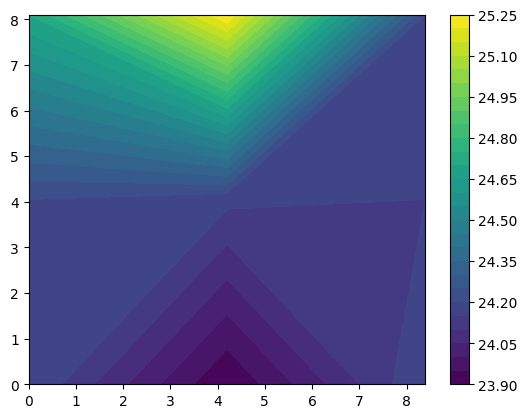

In [229]:
room='LivingRoom'
grid=room_grid(room)
print(grid[3:6,0])
xi,yi=np.meshgrid(grid[3:6,0],grid[:,1][::3])
print(room)
plt.figure(i)
z=interpolate(room)
z_2d = np.reshape(z, (xi.shape[0], xi.shape[1]))
print(xi,'\n',yi,'\n',z_2d)
plt.contourf(xi,yi,z_2d,30)
plt.colorbar()
plt.show()

GF_Room
[[0.    1.575 3.15 ]
 [0.    1.575 3.15 ]
 [0.    1.575 3.15 ]] 
 [[0.  0.  0. ]
 [1.5 1.5 1.5]
 [3.  3.  3. ]] 
 [18.15 18.15 18.15 18.15 18.15 18.15 18.15 18.15 18.15]
GF_bod
GF_Bath
Ungdomsavdeling
[[3.15  5.775 8.4  ]
 [3.15  5.775 8.4  ]
 [3.15  5.775 8.4  ]] 
 [[0.    0.    0.   ]
 [2.625 2.625 2.625]
 [5.25  5.25  5.25 ]] 
 [18.55 19.3  19.3  18.55 18.55 19.3  18.55 18.55 18.55]
Stairs
GuestRoom
MainRoom
FF_Soverom
FF_Bath
Entre
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 
 [[3.   3.   3.  ]
 [5.55 5.55 5.55]
 [8.1  8.1  8.1 ]] 
 [21.05 13.45 13.45 21.05 13.45 13.45 23.25 23.25 13.45]
Office
[[0.    1.625 3.25 ]
 [0.    1.625 3.25 ]
 [0.    1.625 3.25 ]] 
 [[5.25  5.25  5.25 ]
 [6.675 6.675 6.675]
 [8.1   8.1   8.1  ]] 
 [17.85 17.85 17.85 17.85 17.85 17.85 17.85 17.85 17.85]
LivingRoom
[[0.  4.2 0. ]
 [0.  4.2 0. ]
 [0.  4.2 0. ]] 
 [[0.   0.   0.  ]
 [4.05 4.05 4.05]
 [8.1  8.1  8.1 ]] 
 [24.2        23.9        24.2        24.2        24.16385359 24.15
 24.7        25.25    

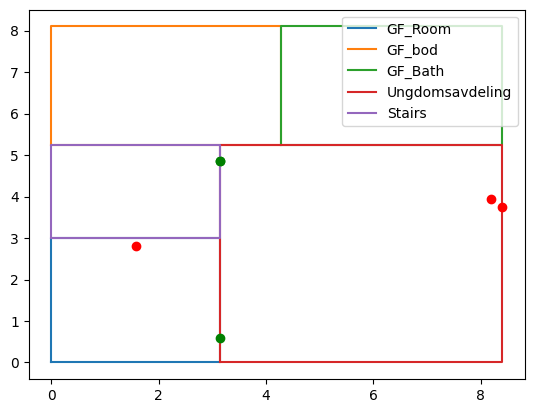

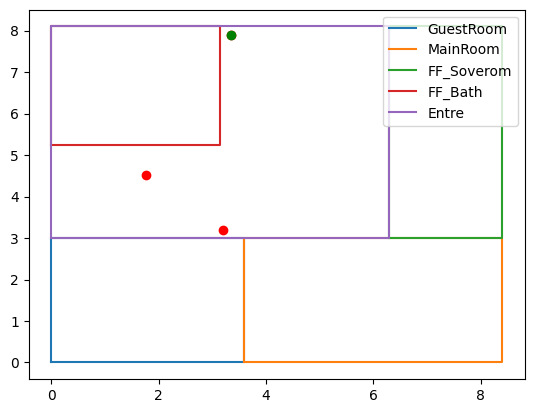

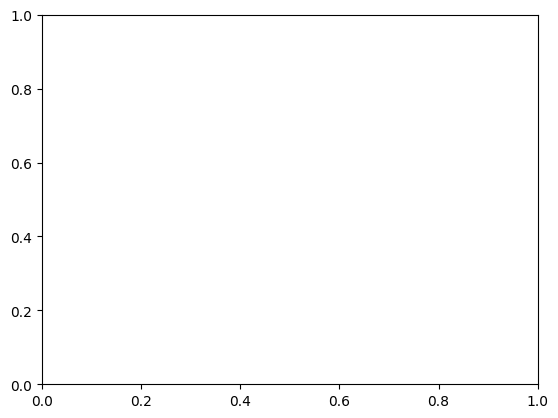

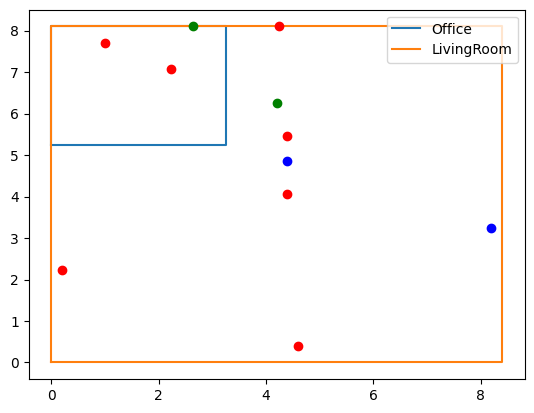

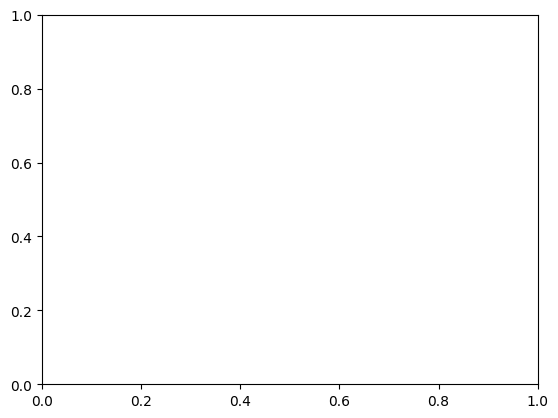

In [197]:
i=0
for floor in Floor:
    i+=1
    for room in Floor[floor]:
        temp=[]
        if len(room_coords[room])<5:
            a=Square_room(room_coords[room])
        else:
            a=Not_square_room(room_coords[room])
        x_coords=a[0],a[2],a[2],a[0],a[0]
        y_coords=a[1],a[1],a[3],a[3],a[1]
        plt.figure(i)
        plt.plot(x_coords,y_coords, label=room)
        plt.legend()
        try:
            S_V=room_sensors[room]
            for sensor in S_V:
                sensor_coord=Sensor_Values[sensor]['coords']
                sensor_name=sensor
                x=sensor_coord[0]
                y=sensor_coord[1]
                if Sensor_Values[sensor]['Type']=='temperature':
                    plt.plot(x,y,'ro')
                elif Sensor_Values[sensor]['Type']=='proximity':
                    plt.plot(x,y,'go')
                elif Sensor_Values[sensor]['Type']=='humidity':
                    plt.plot(x,y,'bo')
                plt.legend(loc='upper right')
        except:
            None
        grid=room_grid(room)
        xi,yi=np.meshgrid(grid[:3,0],grid[:,1][::3])
        try:
            print(room)
            plt.figure(2+i)
            z=interpolate(room)
            print(xi,'\n',yi,'\n',z)
            plt.contour(xi,yi,z)
            plt.legend
        except:
            None


In [ ]:
# Sensor_Values = {}

# # Get a list of all devices in the project.
# devices = dt.Device.list_devices(project_id)

# # Initiate an event stream for all devices in the project.
# for event in dt.Stream.event_stream(project_id):

#     # Check if the event is a temperature event for a device in the project.
#     if event.event_type == 'temperature':
#         device_id = event.device_id
#         sensor_name = dt.Device.get_device(device_id).display_name

#         # Check if the device is in the list of devices.
#         #if device_id in devices:

#         # Extract the temperature data from the event.
#         temperature = event.data.celsius

#         Sensor_Values[sensor_name]['Value']=temperature

#         # yield temperature_response
        
#         # Print the temperature to the console.
#         print(f'Device {sensor_name}: Temperature: {temperature} °C')


#     elif event.event_type=='waterPresent':
#         device_id = event.device_id
#         sensor_name = dt.Device.get_device(device_id).display_name

#         # Extract the temperature data from the event.
#         water_state= event.data.state

#         Sensor_Values[sensor_name]['Value']=water_state

#         # yield temperature_response
        
#         # Print the temperature to the console.
#         print(f'Device {sensor_name}: Water_state: {water_state}')

#     elif event.event_type=='humidity':
#         device_id = event.device_id
#         sensor_name = dt.Device.get_device(device_id).display_name

#         # Extract the temperature data from the event.
#         water_state= event.data.relative_humidity
#         temperature=event.data.temperature

#         Sensor_Values[sensor_name]['Value']=water_state,temperature

#         # yield temperature_response
        
#         # Print the temperature to the console.
#         print(f'Device {sensor_name}: Humidity: {water_state}')

#     elif event.event_type=='proximity':
#         device_id = event.device_id
#         sensor_name = dt.Device.get_device(device_id).display_name

#         # Extract the temperature data from the event.
#         state= event.data.state

#         Sensor_Values[sensor_name]['Value']=state

#         # yield temperature_response
        
#         # Print the temperature to the console.
#         print(f'Device {sensor_name}: Proximity: {state}')

    